In [1]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline
tqdm.pandas()

image0_dir = "./images0"
input_dir = "./input"
target_dir = "./target"

In [2]:
data = pd.DataFrame(columns=["input", "target"])
image_names = os.listdir(image0_dir)

input_images = sorted([filename for filename in image_names if not filename.endswith('b.png')])
target_images = sorted([filename for filename in image_names if filename.endswith('b.png')])

for directory in [input_dir, target_dir]:
    os.makedirs(directory, exist_ok=True)

for input_name, target_name in tqdm(zip(input_images, target_images)):
    input_path = os.path.join("input", input_name).replace("\\", "/")
    target_path = os.path.join("target", target_name).replace("\\", "/")

    input_img = cv2.imread(os.path.join(image0_dir, input_name))
    target_img = cv2.imread(os.path.join(image0_dir, target_name))
    noise = input_img - target_img

    if (noise**2).sum() != 0:
        new_data_row = pd.DataFrame({"input": [input_path], "target": [target_path]})
        data = pd.concat([data, new_data_row], ignore_index=True)

        shutil.copy2(os.path.join(image0_dir, input_name), input_path)
        shutil.copy2(os.path.join(image0_dir, target_name), target_path)

4252it [06:12, 11.43it/s]


In [3]:
data.sample(5)

,input,target
3644,input/003915.png,target/003915b.png
1490,input/001591.png,target/001591b.png
3447,input/003702.png,target/003702b.png
3723,input/004001.png,target/004001b.png
3791,input/004079.png,target/004079b.png


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   3957 non-null   object
 1   target  3957 non-null   object
dtypes: object(2)
memory usage: 62.0+ KB


In [5]:
data.to_csv("./labels.csv", index=False)

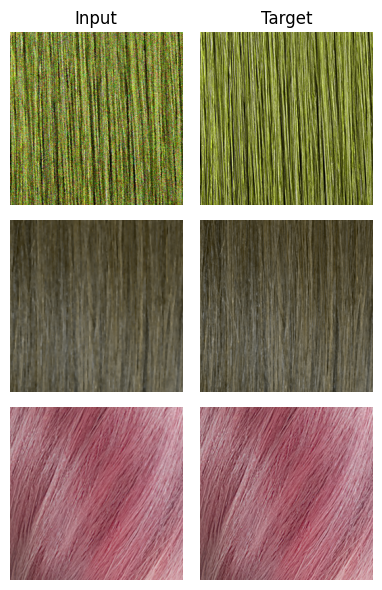

In [12]:
def display_image_grid(image_df):
    fig, axes = plt.subplots(len(image_df), 2, figsize=(4, len(image_df) * 2))

    axes[0, 0].set_title("Input")
    axes[0, 1].set_title("Target")

    for i, (input_p, target_p) in enumerate(image_df.values):
        input_image = cv2.imread(input_p)
        target_image = cv2.imread(target_p)

        input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        target_image_rgb = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)

        for j, image in enumerate([input_image_rgb, target_image_rgb]):
            axes[i, j].imshow(image)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

display_image_grid(data.sample(3))

3957it [01:02, 63.23it/s]


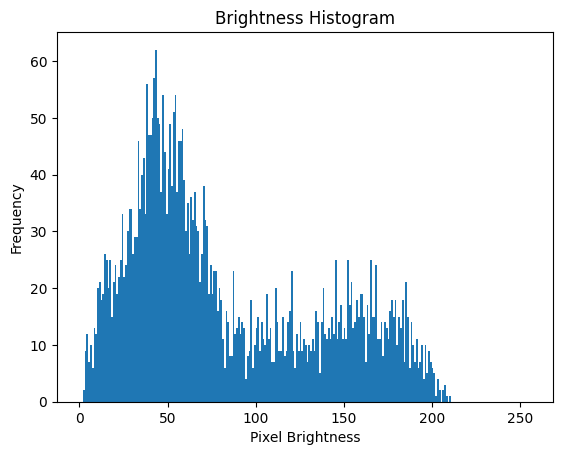

In [13]:
brightness_values = []

for _, row in tqdm(data.iterrows()):
    image = cv2.imread(os.path.join(row['input']))
    brightness_values.append(np.mean(image))

plt.hist(brightness_values, bins=256, range=[0, 256])
plt.title('Brightness Histogram')
plt.xlabel('Pixel Brightness')
plt.ylabel('Frequency')
plt.show()